In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [105]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect


In [106]:
engine = create_engine("sqlite:///hawaii.sqlite")
#engine = create_engine('sqlite:///hawaii.sqlite', connect_args={'check_same_thread': False})
connection = engine.connect


In [107]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

print(engine.table_names())

['measurement', 'station']


In [108]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [109]:
#save refs to each table
Measurement = Base.classes.measurement
Station = Base.classes.station



In [110]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [111]:
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = max_date[0]
max_date

'2017-08-23'

# Exploratory Climate Analysis

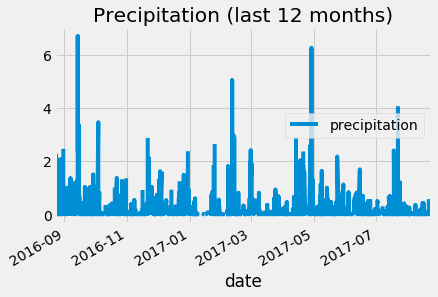

In [54]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results

max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date = max_date[0]

# Calculate the date 1 year ago from today. 366 counts first day of year
year_ago = dt.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=365)
#prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query,columns=['date', 'precipitation'])

# Change datatype from element to datetime object on Pandas
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format='%Y-%m-%d')

# Set index to date
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date',ascending=True)

# plot the data with plot and save png
precipitation_df .plot(title="Precipitation (last 12 months)")
plt.savefig("Precipitation.png")
plt.show()




In [25]:
#checking date
year_ago

datetime.datetime(2016, 8, 22, 0, 0)

In [26]:
#checking date
dt.datetime.strptime(max_date, "%Y-%m-%d")

datetime.datetime(2017, 8, 23, 0, 0)

In [27]:
precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# Design a query to show how many stations are available in this dataset?
#check station table data
Base.classes.station.__dict__



mappingproxy({'__table__': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 1c49bc8b588>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b708>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b7c8>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b888>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b948

In [41]:
# Design a query to show how many stations are available in this dataset?
#Create station df with id and name
query_2 = session.query(Station.id, Station.station,  Station.name, Station.latitude, Station.longitude, Station.elevation).all()
stations_df = pd.DataFrame(query_2,columns=['id', 'station','name', 'latitude','longitude','elevation'])
stations_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [42]:
# Design a query to show how many stations are available in this dataset?
unique_station = stations_df["id"].unique()
print(len(unique_station))

9


In [43]:
Base.classes.measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 1c49bc8b048>,
              '__init__': <function __init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b228>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b2e8>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b3a8>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1c49bc8b468>,
              'tobs': <sqlalc

In [44]:
#create measurement df for analysis
query_3 = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
measure_df = pd.DataFrame(query_3,columns=['id', 'station','date', 'prcp','tobs'])
measure_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
bystation_count = measure_df["station"].value_counts()
bystation_count

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [88]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
active_station



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Using the station id from the previous query, calculate the lowest temperature recorded
#min_temp_df = measure_df.groupby(['station'])["tobs"].min()
#min_temp_df.head(10)

temp_station=session.query(Measurement.station, func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station=="USC00519281").all()
temp_station





[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [77]:
# highest temperature recorded, and average temperature of the most active station?
#measure_df['tobs'].value_counts().nlargest(n=1)
#measure_active_df = measure_df.loc[measure_df["station"]=="USC00519281"]
#mactive_max_df = measure_active_df.max()
#mactive_mean_df = measure_active_df.mean()
#mactive_maxtemp_df
#mactive_mean_df


#mactive_maxtemp = measure_active_df.groupby(["Mouse ID"]).mean()
#USC00519281

id      13573.500000
prcp        0.212352
tobs       71.663781
dtype: float64

In [102]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12_temp =session.query(Measurement.station, (Measurement.tobs)).\
filter(Measurement.station=="USC00519281").filter(Measurement.date >= year_ago).all()
last12_df = pd.DataFrame(last12_temp,columns=['station', 'tobs'])
last12_df1 = last12_df.set_index("station")



last12_df1





,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0


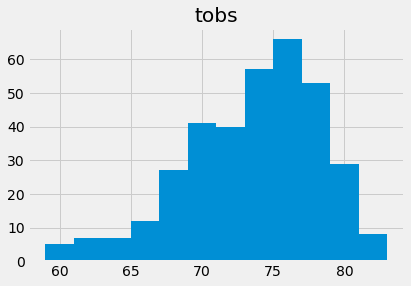

In [103]:
last12_df1.hist(bins=12)
plt.savefig("Last 12 Months Temp.png")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
